# Hierarchial Clustering



*  the algorithm will group all the similar objects into groups called clusters
*   each cluster is different from each other


In [ ]:
#here we will first import all the modules and packages that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load the data
data = pd.read_csv('mall.csv')

In [ ]:
#get the shape of the data
data.shape

(200, 5)

In [ ]:
#display the first 6 data
data.head(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76


In [ ]:
x = data.iloc[:, [3, 4]].values
print(x.shape)

(200, 2)


 dendrogram


*   its the output of Hierarchical clustering
*   shows the relationship between the clusters





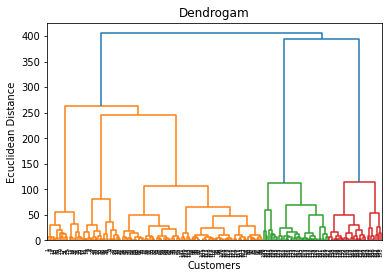

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

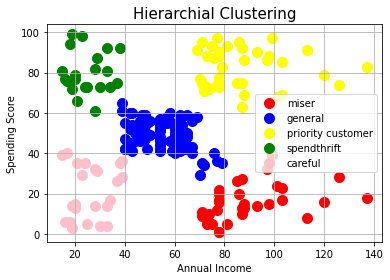

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'yellow', label = 'priority customer')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'green', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'pink', label = 'careful')

plt.title('Hierarchial Clustering', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()















#Here we will do the analysis of the Text and the Topic Modelling

In [ ]:
papers=pd.read_csv('papers.csv',error_bad_lines=False,engine='python')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
papers.head()

,year,title,abstract,paper_text
4310,2013,Non-strongly-convex smooth stochastic approxim...,We consider the stochastic approximation probl...,Non-strongly-convex smooth stochastic\napproxi...
6398,1987,Strategies for Teaching Layered Networks Class...,Abstract Missing,850\n\nStrategies for Teaching Layered Network...
3245,1990,Chaitin-Kolmogorov Complexity and Generalizati...,Abstract Missing,Chaitin-Kolmogorov Complexity\nand Generalizat...
2599,2007,A learning framework for nearest neighbor search,Can we leverage learning techniques to build a...,A Learning Framework for Nearest Neighbor Sear...
3758,2011,RTRMC: A Riemannian trust-region method for lo...,We consider large matrices of low rank. We add...,RTRMC: A Riemannian trust-region method for\nl...


In [ ]:
import re

# Lets remove the punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# The titles are Converted to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-45-d2f5bd7c2a3e>:5: DeprecationWarning: invalid escape sequence \.
  papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))


4310    non-strongly-convex smooth stochastic\napproxi...
6398    850\n\nstrategies for teaching layered network...
3245    chaitin-kolmogorov complexity\nand generalizat...
2599    a learning framework for nearest neighbor sear...
3758    rtrmc: a riemannian trust-region method for\nl...
Name: paper_text_processed, dtype: object

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


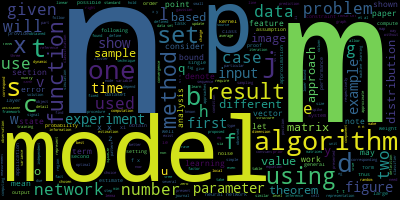

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=1000, contour_width=3, contour_color='yellow')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['non', 'strongly', 'convex', 'smooth', 'stochastic', 'approximation', 'convergence', 'rate', 'eric', 'moulines', 'ltci', 'telecom', 'paristech', 'paris', 'france', 'ericmoulines', 'enstfr', 'francis', 'bach', 'inria', 'sierra', 'project', 'team', 'ecole', 'normale', 'superieure', 'paris', 'france', 'francisbach', 'ensfr']


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 5), (5, 2), (6, 10), (7, 1), (8, 1), (9, 12), (10, 1), (11, 1), (12, 1), (13, 3), (14, 1), (15, 3), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 24), (26, 22), (27, 1), (28, 5), (29, 1)]


In [ ]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.008*"st" + 0.004*"two" + 0.004*"function" + 0.004*"ht" + 0.004*"model" + '
  '0.004*"set" + 0.003*"data" + 0.003*"matrix" + 0.003*"also" + 0.003*"one"'),
 (1,
  '0.006*"data" + 0.006*"model" + 0.005*"learning" + 0.004*"one" + '
  '0.004*"results" + 0.004*"set" + 0.003*"algorithm" + 0.003*"function" + '
  '0.003*"two" + 0.003*"using"'),
 (2,
  '0.006*"learning" + 0.005*"model" + 0.005*"algorithm" + 0.005*"set" + '
  '0.005*"data" + 0.005*"function" + 0.004*"time" + 0.003*"two" + 0.003*"one" '
  '+ 0.003*"also"'),
 (3,
  '0.005*"data" + 0.004*"algorithm" + 0.004*"set" + 0.004*"learning" + '
  '0.004*"matrix" + 0.004*"function" + 0.004*"model" + 0.004*"time" + '
  '0.003*"using" + 0.003*"used"'),
 (4,
  '0.007*"learning" + 0.005*"one" + 0.005*"data" + 0.005*"function" + '
  '0.004*"set" + 0.004*"model" + 0.003*"results" + 0.003*"matrix" + '
  '0.003*"neural" + 0.003*"using"'),
 (5,
  '0.005*"algorithm" + 0.005*"data" + 0.005*"matrix" + 0.005*"network" + '
  '0.005*"model" + 0.00

In [ ]:
pip install pyLDAvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
import os
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.000241  0.000783       1        1  20.026359
5     -0.009424  0.003333       2        1  17.475975
2     -0.001592  0.002836       3        1  14.090166
6     -0.006192 -0.001747       4        1  11.624284
8      0.004154 -0.000549       5        1   9.336773
7     -0.000582 -0.015227       6        1   8.456656
4     -0.000906  0.002005       7        1   6.547246
1      0.000185  0.004502       8        1   5.598048
3     -0.002019  0.002565       9        1   3.816866
0      0.016617  0.001497      10        1   3.027627, topic_info=           Term         Freq        Total Category  logprob  loglift
2509         st   361.000000   361.000000  Default  30.0000  30.0000
167        data  1031.000000  1031.000000  Default  29.0000  29.0000
477       model  1107.000000  1107.000000  Default  28.0000  28.0000
419    learning  1139.000000  1139.000000  Default  27.0000  27.0000
310    function   911.000000   911.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
248       error    14.692345   576.417563  Topic10  -6.1759  -0.1721
842        time    15.646370   753.962317  Topic10  -6.1129  -0.3777
478      models    14.281438   546.574413  Topic10  -6.2042  -0.1473
3956     kernel    13.934858   501.761404  Topic10  -6.2288  -0.0863
25    algorithm    14.555294  1066.406707  Topic10  -6.1852  -0.7967

[852 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
2071       1  0.189538     abg
2071       2  0.189538     abg
2071       3  0.189538     abg
2071       9  0.189538     abg
7726       1  0.190744     ach
...      ...       ...     ...
2822       7  0.124483  yamada
2822       8  0.062242  yamada
13375      5  0.277817     ylr
7581       2  0.265603    zhai
7581       3  0.265603    zhai

[3741 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 3, 7, 9, 8, 5, 2, 4, 1])